In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ott_datas.csv to ott_datas.csv


In [ ]:
df = pd.read_csv("/content/ott_datas.csv", encoding="ISO-8859-1")

In [ ]:
df

,Title,Type,Release_date,Language,Rating,Genre,Popularity,Platform,Country,Duration,Market
0,KPop Demon Hunters,Movie,20-06-2025,en,8.347,"Animation, Comedy, Fantasy, Music",158.0698,Netflix,US,96.0,US
1,Fall for Me,Movie,20-08-2025,de,6.100,"Romance, Thriller",78.5663,Netflix,DE,103.0,DE
2,Inspector Zende,Movie,04-09-2025,hi,5.800,"Comedy, Drama, Thriller",64.7600,Netflix,IN,112.0,IN
3,Love Untangled,Movie,28-08-2025,ko,8.523,"Romance, Drama, Comedy",63.5867,Netflix,KR,121.0,KR
4,Gold Rush Gang,Movie,19-08-2025,th,6.900,"Action, Comedy, Drama, Western",65.0888,Netflix,TH,120.0,TH
...,...,...,...,...,...,...,...,...,...,...,...
3395,Magic of Disney's Animal Kingdom,TV,25-09-2020,en,7.700,"Documentary, Reality",0.8932,Disney+,"GB, US",36.0,Global
3396,Edge of the Unknown with Jimmy Chin,TV,05-09-2022,en,7.300,Documentary,1.0076,Disney+,US,23.0,US
3397,Sell This House,TV,06-07-2003,en,6.000,NaN,0.8215,Disney+,US,30.0,US
3398,The Best Heart Attack of My Life,TV,24-01-2025,es,7.600,"Drama, Comedy",0.9896,Disney+,"AR, ES",NaN,Global


In [ ]:
 #Handle Release Date
df['Release_date_parsed'] = pd.to_datetime(df['Release_date'], dayfirst=True, errors='coerce')
df['release_year'] = df['Release_date_parsed'].dt.year.fillna(0).astype(int)
df['release_month'] = df['Release_date_parsed'].dt.month.fillna(0).astype(int)
df['release_day'] = df['Release_date_parsed'].dt.day.fillna(0).astype(int)
df['release_weekday'] = df['Release_date_parsed'].dt.weekday.fillna(-1).astype(int)

In [ ]:
df.drop(columns=['Release_date_parsed','release_weekday','Release_date'], inplace=True)

In [ ]:
# BAsic checkings

In [ ]:
df.shape

(3400, 13)

In [ ]:
df.head()

,Title,Type,Language,Rating,Genre,Popularity,Platform,Country,Duration,Market,release_year,release_month,release_day
0,KPop Demon Hunters,Movie,en,8.347,"Animation, Comedy, Fantasy, Music",158.0698,Netflix,US,96.0,US,2025,6,20
1,Fall for Me,Movie,de,6.100,"Romance, Thriller",78.5663,Netflix,DE,103.0,DE,2025,8,20
2,Inspector Zende,Movie,hi,5.800,"Comedy, Drama, Thriller",64.7600,Netflix,IN,112.0,IN,2025,9,4
3,Love Untangled,Movie,ko,8.523,"Romance, Drama, Comedy",63.5867,Netflix,KR,121.0,KR,2025,8,28
4,Gold Rush Gang,Movie,th,6.900,"Action, Comedy, Drama, Western",65.0888,Netflix,TH,120.0,TH,2025,8,19


In [ ]:
df.tail()

,Title,Type,Language,Rating,Genre,Popularity,Platform,Country,Duration,Market,release_year,release_month,release_day
3395,Magic of Disney's Animal Kingdom,TV,en,7.7,"Documentary, Reality",0.8932,Disney+,"GB, US",36.0,Global,2020,9,25
3396,Edge of the Unknown with Jimmy Chin,TV,en,7.3,Documentary,1.0076,Disney+,US,23.0,US,2022,9,5
3397,Sell This House,TV,en,6.0,NaN,0.8215,Disney+,US,30.0,US,2003,7,6
3398,The Best Heart Attack of My Life,TV,es,7.6,"Drama, Comedy",0.9896,Disney+,"AR, ES",NaN,Global,2025,1,24
3399,Lost Treasures of Rome,TV,en,7.1,Documentary,0.9110,Disney+,GB,44.0,GB,2022,5,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          3400 non-null   object 
 1   Type           3400 non-null   object 
 2   Language       3400 non-null   object 
 3   Rating         3400 non-null   float64
 4   Genre          3397 non-null   object 
 5   Popularity     3400 non-null   float64
 6   Platform       3400 non-null   object 
 7   Country        3326 non-null   object 
 8   Duration       2885 non-null   float64
 9   Market         3400 non-null   object 
 10  release_year   3400 non-null   int64  
 11  release_month  3400 non-null   int64  
 12  release_day    3400 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 345.4+ KB


In [ ]:
df.describe()

,Rating,Popularity,Duration,release_year,release_month,release_day
count,3400.000000,3400.000000,2885.000000,3400.000000,3400.000000,3400.000000
mean,6.983323,9.388265,83.238475,2012.502059,6.819118,15.467059
std,1.115558,18.392377,45.323425,14.774245,3.333823,8.648072
min,0.000000,0.742900,0.000000,1927.000000,1.000000,1.000000
25%,6.500000,4.232775,43.000000,2008.000000,4.000000,8.000000
50%,7.100000,5.800450,92.000000,2018.000000,7.000000,15.000000
75%,7.700000,9.114300,115.000000,2022.000000,10.000000,23.000000
max,10.000000,581.370300,448.000000,2025.000000,12.000000,31.000000


In [ ]:
df.Platform.unique()

array(['Netflix', 'Amazon Prime', 'Disney+'], dtype=object)

In [ ]:
# Filter out rows where 'Platform' is not one of the specified values
valid_platforms = ['Netflix', 'Amazon Prime', 'Disney+']
df = df[df['Platform'].isin(valid_platforms)]

# Display the value counts of the 'Platform' column to confirm
display(df['Platform'].value_counts())

,count
Platform,
Netflix,1568
Disney+,877
Amazon Prime,861


In [ ]:
df = df[~df['Platform'].isin(['92.0', '7.1'])]
display(df.Platform.value_counts())

,count
Platform,
Netflix,1568
Disney+,877
Amazon Prime,861


In [ ]:
df.isnull().sum()

,0
Title,0
Type,0
Language,0
Rating,0
Genre,3
Popularity,0
Platform,0
Country,74
Duration,515
Market,0


In [ ]:
# Fill Missing values

In [ ]:
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

In [ ]:
df['Country'] = df['Country'].fillna(df['Country'].mode())

In [ ]:
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])

In [ ]:
df[df['Country'].isnull()]

,Title,Type,Language,Rating,Genre,Popularity,Platform,Country,Duration,Market,release_year,release_month,release_day
119,Cztery Pory Roku,Movie,pl,0.000,"Drama, Romance",7.9264,Netflix,NaN,2.0,Unknown,2025,8,18
269,Stolen: Heist of the Century,Movie,en,7.021,"Documentary, Crime",5.4148,Netflix,NaN,96.0,Unknown,2025,8,7
483,Sinam,Movie,ta,4.600,"Action, Thriller, Crime",4.5414,Netflix,NaN,115.0,Unknown,2022,9,16
521,OxygÃ¨ne,Movie,fr,0.000,Drama,3.3140,Netflix,NaN,0.0,Unknown,2024,10,14
568,Making The Helicopter Heist,Movie,sv,10.000,Documentary,4.1135,Netflix,NaN,20.0,Unknown,2024,11,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,LEGO Star Wars: The Resistance Rises,TV,en,6.300,"Animation, Sci-Fi & Fantasy, Comedy, Kids",1.2450,Disney+,NaN,5.0,Unknown,2016,2,15
3312,My 600-lb Life: Where Are They Now?,TV,en,5.500,Reality,1.1628,Disney+,NaN,85.0,Unknown,2015,1,7
3332,The Prison Confessions of Gypsy Rose Blanchard,TV,en,7.100,"Documentary, Crime",1.1450,Disney+,NaN,256.0,Unknown,2024,1,5
3352,Mickey's Mousekersize,TV,en,9.300,"Kids, Animation",1.1102,Disney+,NaN,3.0,Unknown,2011,2,14


In [ ]:
pd.set_option("display.max_rows", None)

# Show all rows with null Country
print(df[df['Country'].isnull()])

# Reset option (optional)
pd.reset_option("display.max_rows")

                                                  Title   Type Language  \
119                                    Cztery Pory Roku  Movie       pl   
269                        Stolen: Heist of the Century  Movie       en   
483                                               Sinam  Movie       ta   
521                                            OxygÃ¨ne  Movie       fr   
568                         Making The Helicopter Heist  Movie       sv   
619                                     Pattathu Arasan  Movie       ta   
620                                     Pattathu Arasan  Movie       ta   
673                                     The Resemblance  Movie       en   
804                              Manson Family Vacation  Movie       en   
820   The Other One: The Long, Strange Trip of Bob Weir  Movie       en   
856                                   Operation Mayfair  Movie       hi   
934                     Jordan Jensen: Take Me With You  Movie       en   
1105                     

In [ ]:
df = df.dropna(subset=['Country'])

In [ ]:
df.shape

(3326, 13)

In [ ]:
df.loc[df['Rating']==0]

,Title,Type,Language,Rating,Genre,Popularity,Platform,Country,Duration,Market,release_year,release_month,release_day
527,Whispers in the Wind,Movie,tl,0.0,Drama,4.3384,Netflix,PH,96.0,PH,2024,8,21
635,Adire,Movie,en,0.0,Drama,3.8664,Netflix,NG,124.0,NG,2023,9,3
716,Kuiko,Movie,ta,0.0,"Drama, Family",3.6561,Netflix,IN,112.0,IN,2023,11,24
757,The Platform,Movie,en,0.0,"Comedy, Drama",3.5953,Netflix,BG,94.0,BG,2025,3,21
1113,All of Us Are Dead,TV,ko,0.0,"Action & Adventure, Drama, Sci-Fi & Fantasy",17.0709,Netflix,KR,65.0,KR,2022,1,28
1176,Kiss or Die,TV,ja,0.0,"Reality, Comedy",10.5338,Netflix,JP,92.0,JP,2025,9,9
1534,"Dr. Seuss's Red Fish, Blue Fish",TV,en,0.0,"Animation, Kids",5.2501,Netflix,CA,92.0,CA,2025,9,8
1924,Five Pretty Young Ladies,Movie,zh,0.0,"Comedy, Crime, Action, Science Fiction",5.1365,Amazon Prime,TW,93.0,TW,1975,2,21
1978,Ammani,Movie,ta,0.0,"Family, Drama",5.1819,Amazon Prime,IN,92.0,IN,2016,10,14
1985,"Bhagat Singh, the Immortal Martyr",Movie,hi,0.0,Action,4.5914,Amazon Prime,IN,131.0,IN,1974,1,1


In [ ]:
df.loc[df['Rating']==0]=np.median(df.Rating)

/tmp/ipython-input-918145552.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Rating']==0]=np.median(df.Rating)
/tmp/ipython-input-918145552.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Rating']==0]=np.median(df.Rating)
/tmp/ipython-input-918145552.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Rating']==0]=np.median(df.Rating)


In [ ]:
df.loc[df['Duration']==0]=np.median(df.Duration)

In [ ]:
df.loc[df['Duration']==0]

,Title,Type,Language,Rating,Genre,Popularity,Platform,Country,Duration,Market,release_year,release_month,release_day


In [ ]:
df.isnull().sum()

,0
Title,0
Type,0
Language,0
Rating,0
Genre,0
Popularity,0
Platform,0
Country,0
Duration,0
Market,0


In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Print columns and their dtypes for inspection
print("Categorical Columns and dtypes:")
print(X[categorical_cols].dtypes)
print("\nNumerical Columns and dtypes:")
print(X[numerical_cols].dtypes)

Categorical Columns and dtypes:
Title       object
Type        object
Language    object
Genre       object
Platform    object
Country     object
Market      object
dtype: object

Numerical Columns and dtypes:
Popularity       float64
Duration         float64
release_year     float64
release_month    float64
release_day      float64
dtype: object


In [ ]:
#Finding outliers

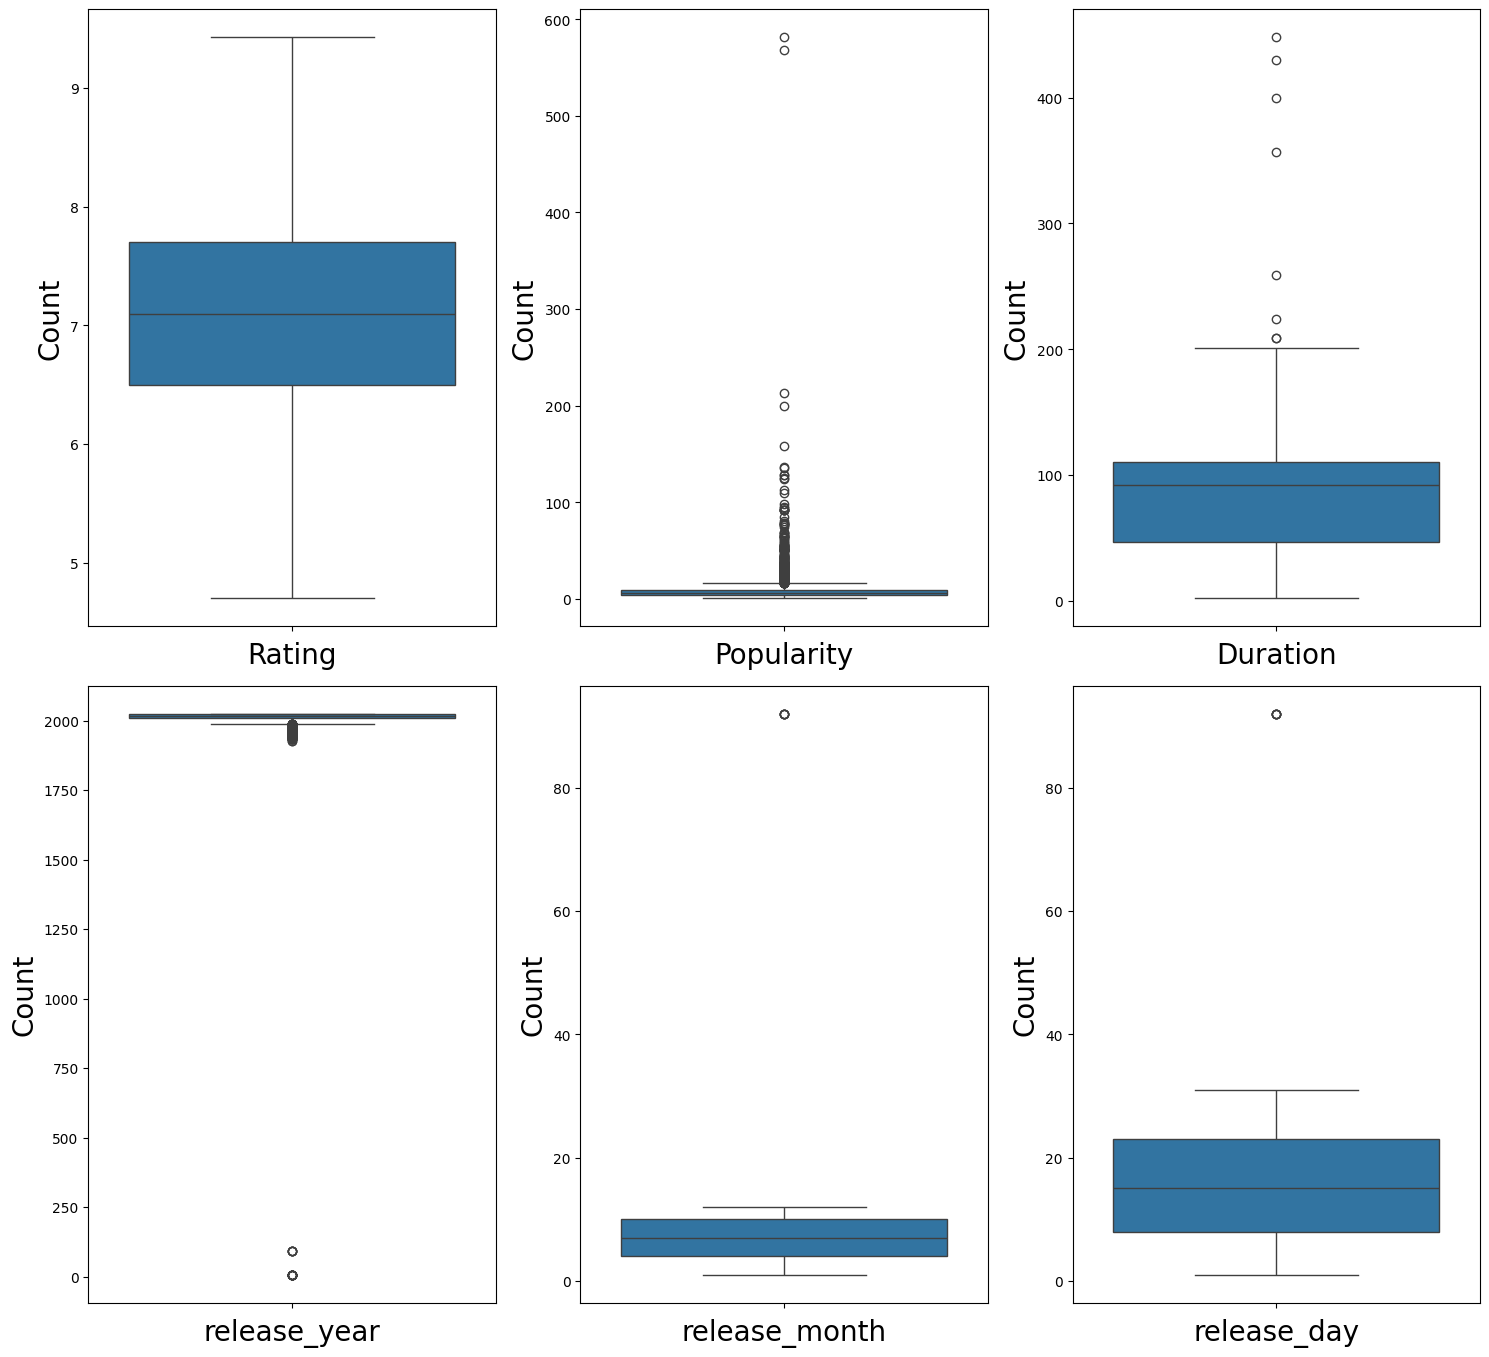

In [ ]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1

# Select only numerical columns for plotting
numerical_cols_plot = df.select_dtypes(include=np.number).columns.tolist()

for column in numerical_cols_plot:
    if plotnumber<=len(numerical_cols_plot):
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Rating

In [ ]:
Q1=df.Rating.quantile(0.25)
Q3=df.R.quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

np.float64(1.2000000000000002)

In [ ]:
lowerboundry=Q1-(1.5*IQR)
lowerboundry

np.float64(4.699999999999999)

In [ ]:
upperboundry=Q3+(1.5*IQR)
upperboundry

np.float64(16.5158625)

In [ ]:
df.loc[(df['Rating']>upperboundry),'Rating']= np.median(df.Rating)

<Axes: ylabel='Rating'>

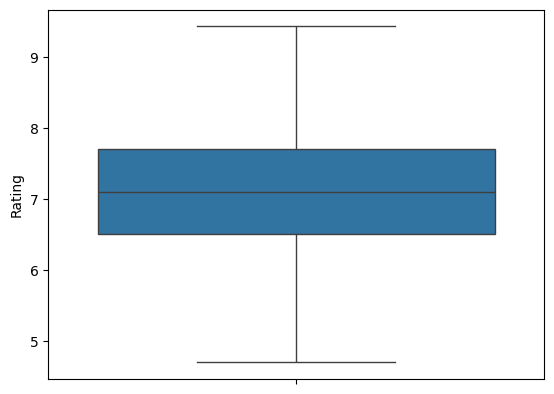

In [ ]:
sns.boxplot(df.Rating)

In [ ]:
# Popularity

In [ ]:
Q1=df.Popularity.quantile(0.25)
Q3=df.Popularity.quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

np.float64(3.026675)

In [ ]:
lowerboundry=Q1-(1.5*IQR)
lowerboundry

np.float64(-0.28621249999999954)

In [ ]:
upperboundry=Q3+(1.5*IQR)
upperboundry

np.float64(11.820487499999999)

In [ ]:
df.loc[(df['Popularity']>upperboundry),'Popularity']= np.median(df.Popularity)

<Axes: ylabel='Popularity'>

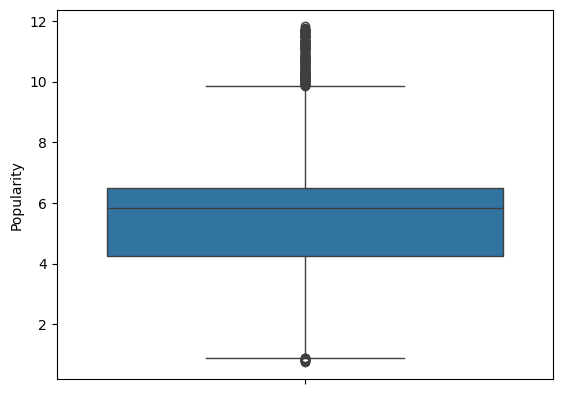

In [ ]:
sns.boxplot(df.Popularity)

In [ ]:
# Duration

In [ ]:
Q1=df.Duration.quantile(0.25)
Q3=df.Duration.quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

np.float64(63.0)

In [ ]:
lowerboundry=Q1-(1.5*IQR)
lowerboundry

np.float64(-47.5)

In [ ]:
upperboundry=Q3+(1.5*IQR)
upperboundry

np.float64(204.5)

In [ ]:
df.loc[(df['Duration']>upperboundry),'Duration']= np.median(df.Duration)

<Axes: ylabel='Duration'>

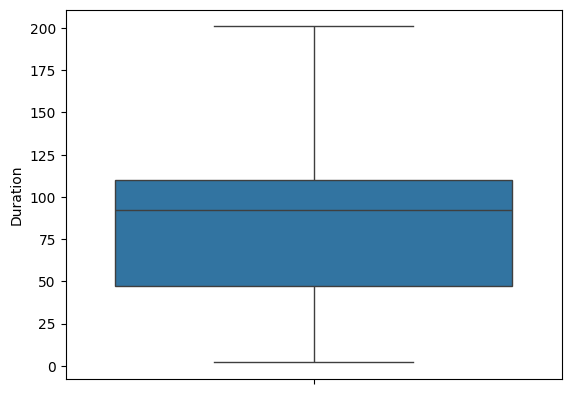

In [ ]:
sns.boxplot(df.Duration)

In [ ]:
#Release yr

In [ ]:
Q1=df.release_year.quantile(0.25)
Q3=df.release_year.quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

np.float64(14.0)

In [ ]:
lowerboundry=Q1-(1.5*IQR)
lowerboundry

np.float64(1987.0)

In [ ]:
upperboundry=Q3+(1.5*IQR)
upperboundry

np.float64(2043.0)

In [ ]:
df.loc[(df['release_year']>upperboundry),'release_year']= np.median(df.release_year)

In [ ]:
df.loc[(df['release_year']<lowerboundry),'release_year']= np.median(df.release_year)

<Axes: ylabel='release_year'>

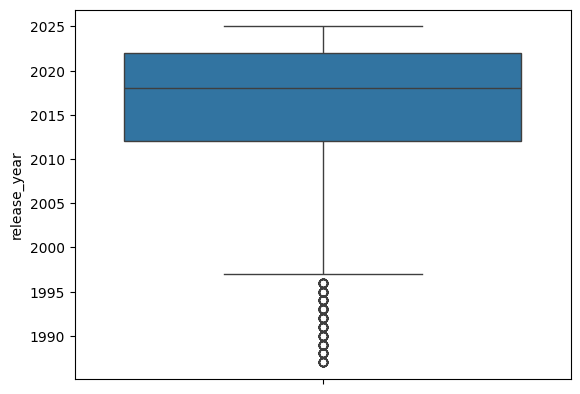

In [ ]:
sns.boxplot(df.release_year)

In [ ]:
df.shape

(3306, 13)

In [ ]:
# Filter out rows where 'Platform' is not one of the specified values
valid_platforms = ['Netflix', 'Amazon Prime', 'Disney+']
df = df[df['Platform'].isin(valid_platforms)]

# Display the value counts of the 'Platform' column to confirm
display(df['Platform'].value_counts())

,count
Platform,
Netflix,1568
Disney+,877
Amazon Prime,861


In [ ]:
# Data Visualization

<Axes: xlabel='Platform', ylabel='count'>

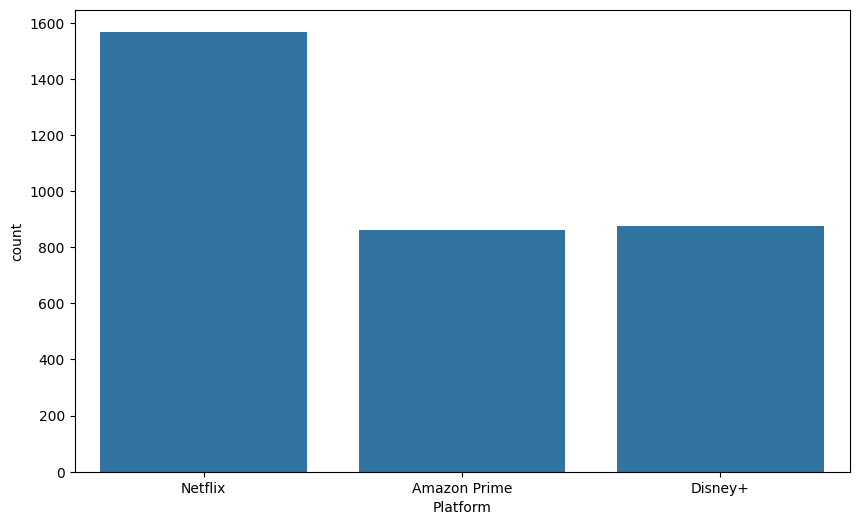

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform',data=df)

<Axes: xlabel='Type', ylabel='count'>

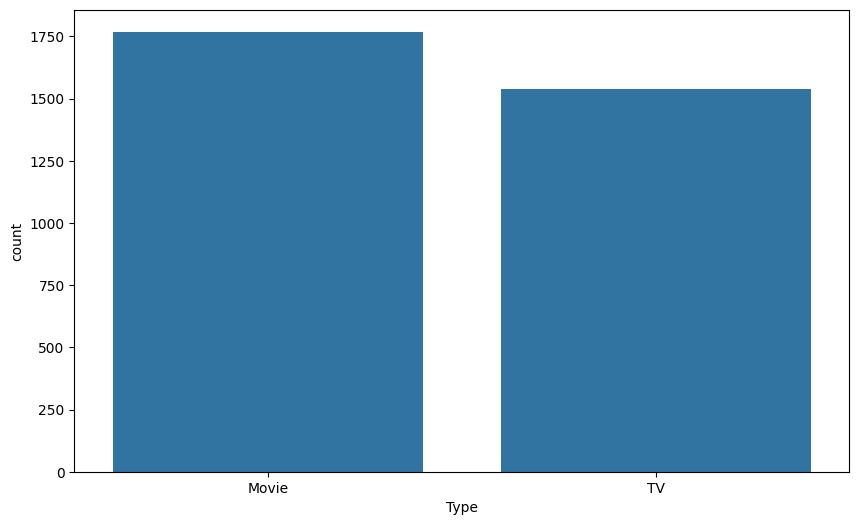

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type',data=df)

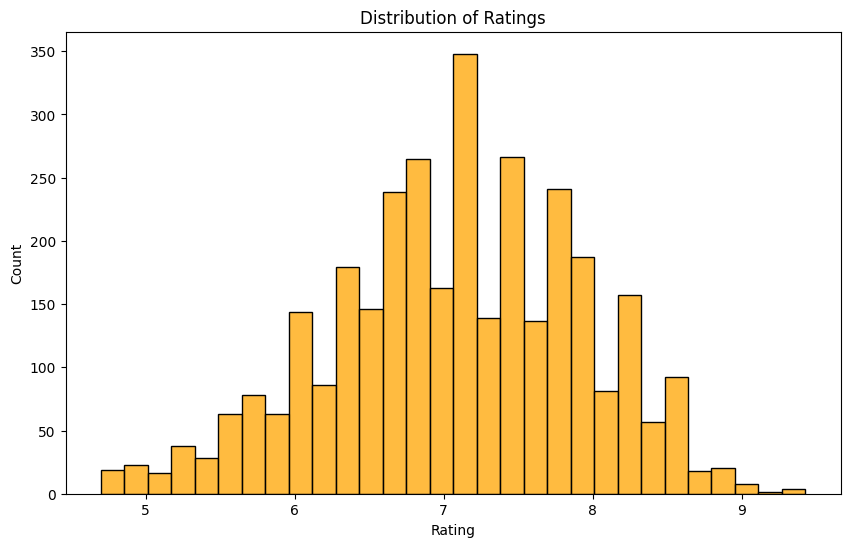

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Rating', data=df,color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

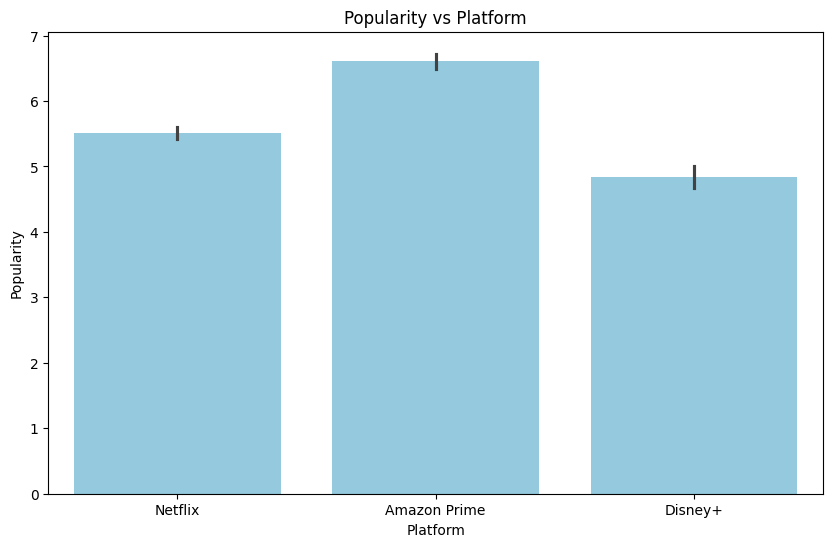

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Popularity', data=df,color='skyblue')
plt.title('Popularity vs Platform')
plt.show()

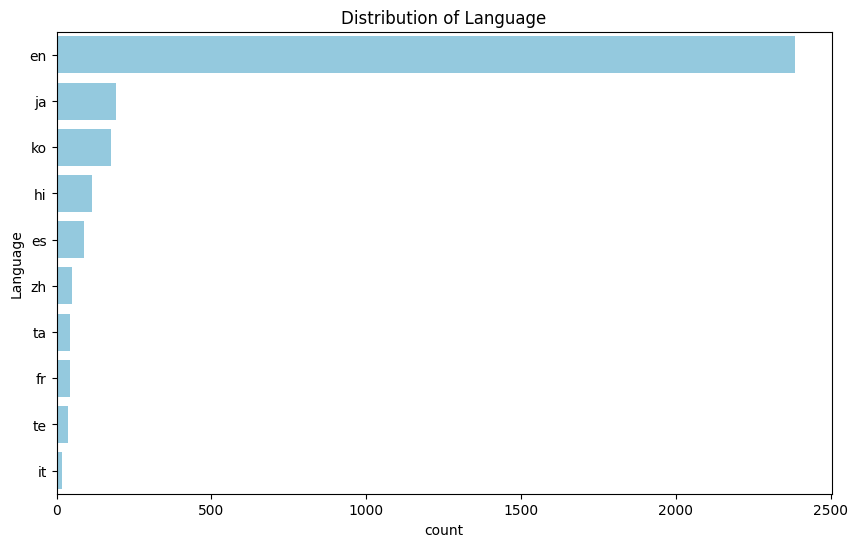

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Language', data=df, order=df['Language'].value_counts().index[:10], color='skyblue')
plt.title('Distribution of Language')
plt.show()

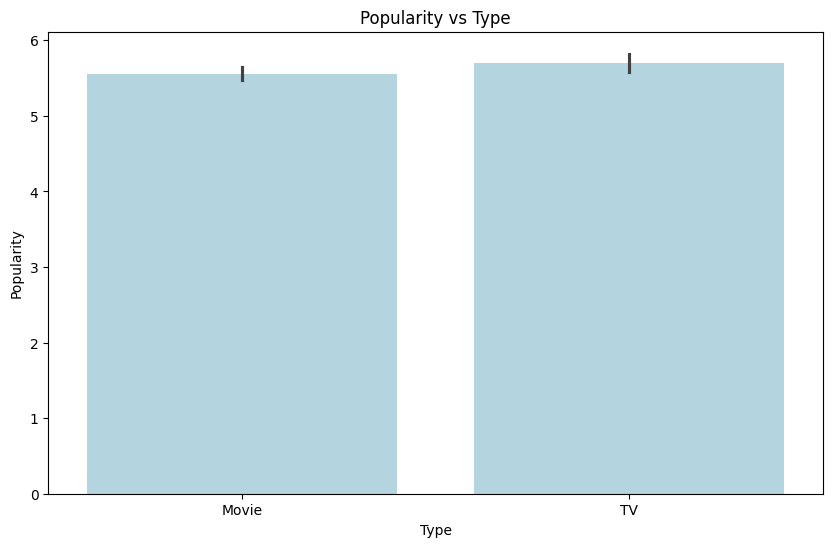

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Popularity', data=df, color='lightblue')
plt.title('Popularity vs Type')
plt.show()

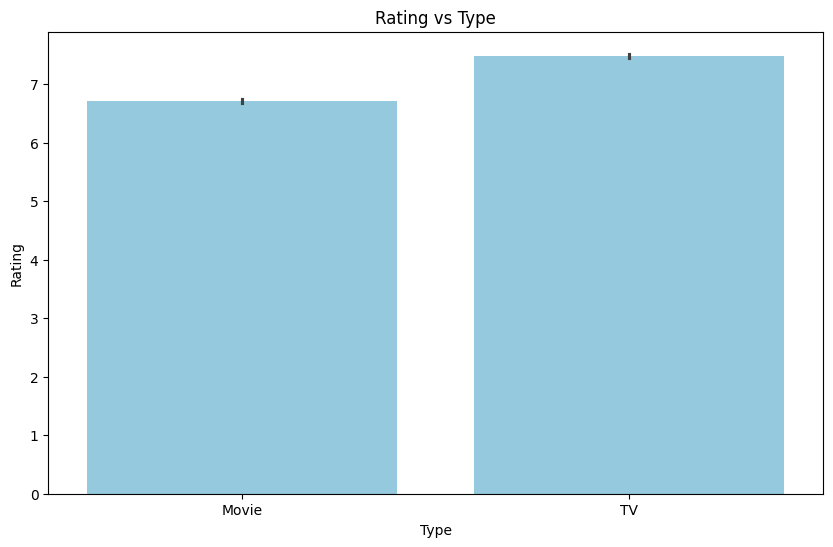

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Rating', data=df, color='skyblue')
plt.title('Rating vs Type')
plt.show()

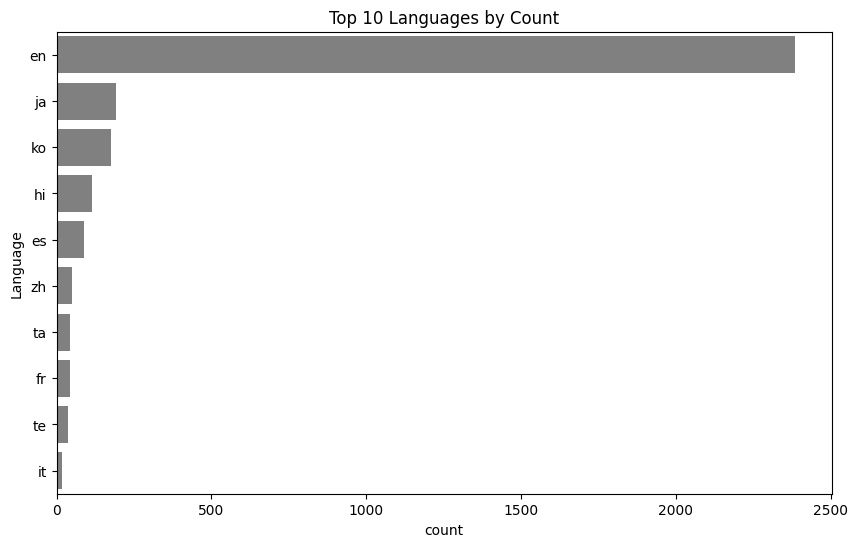

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Language', data=df, order=df['Language'].value_counts().index[:10], color='grey')
plt.title('Top 10 Languages by Count')
plt.show()

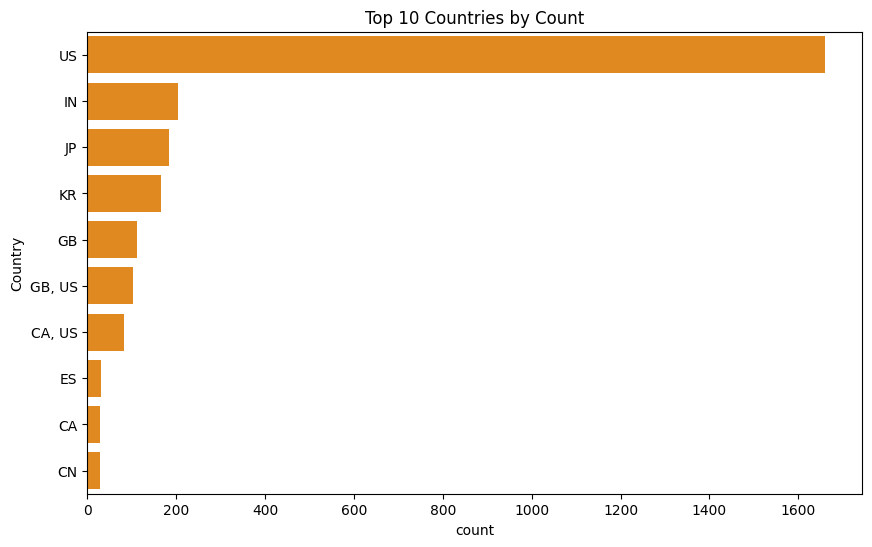

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10], color='darkorange')
plt.title('Top 10 Countries by Count')
plt.show()

/tmp/ipython-input-1144667772.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(1, 0, 'Soap'),
  Text(2, 0, 'Sci-Fi & Fantasy'),
  Text(3, 0, 'Action & Adventure'),
  Text(4, 0, 'War & Politics'),
  Text(5, 0, 'Animation'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Mystery'),
  Text(8, 0, 'Kids'),
  Text(9, 0, 'Documentary')])

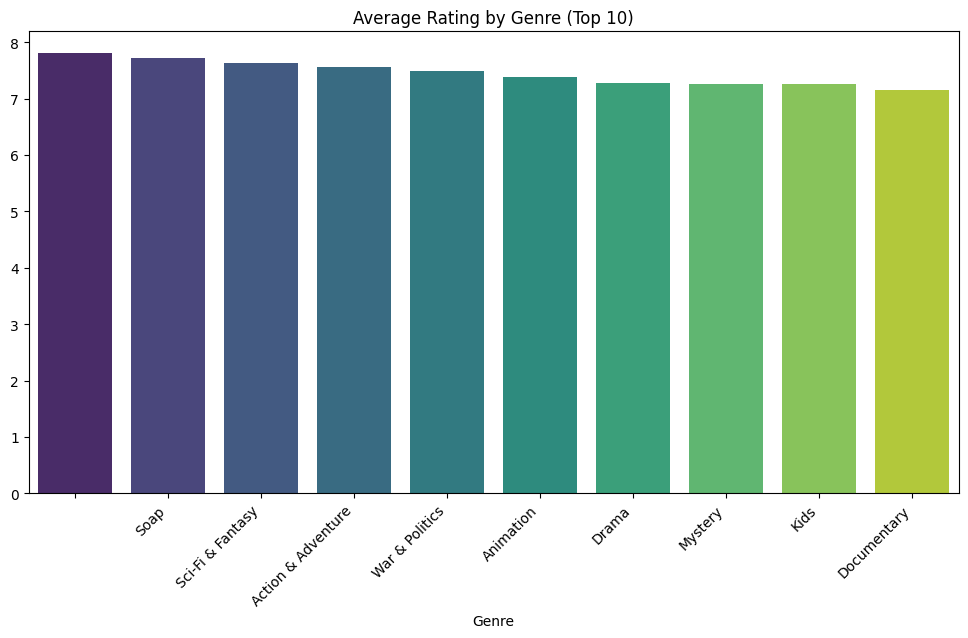

In [ ]:
df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_genres = df_genres.explode('Genre')
avg_rating_by_genre = df_genres.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette='viridis')
plt.title('Average Rating by Genre (Top 10)')
plt.xticks(rotation=45, ha='right')

In [ ]:
# scaling and encoding

In [ ]:
X=df.drop(columns=['Rating',])
y=df['Rating']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("to_string", FunctionTransformer(lambda x: x.astype(str))), # Add step to convert to string
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numerical_cols),
        ("cat", cat_transformer, categorical_cols)
    ])

In [ ]:
def evaluate(model, X_test, y_test):
    """Evaluate regression model with R², MAE, RMSE"""
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"R² Score : {r2:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"RMSE     : {rmse:.4f}")
    return {"R2": r2, "MAE": mae, "RMSE": rmse}


In [ ]:
# Define the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', rf_model)])

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', gb_model)])

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb_model)])

# Train the models
print("Training Random Forest Regressor...")
rf_pipeline.fit(X_train, y_train)

print("\nTraining Gradient Boosting Regressor...")
gb_pipeline.fit(X_train, y_train)

print("\nTraining XGBoost Regressor...")
xgb_pipeline.fit(X_train, y_train)

Training Random Forest Regressor...

Training Gradient Boosting Regressor...

Training XGBoost Regressor...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Popularity', 'Duration',
                                                   'release_year',
                                                   'release_month',
                                                   'release_day']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('to_string',
                                                                   FunctionTransformer(func=<fu...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
# Evaluate the models
print("\nEvaluating Random Forest Regressor:")
evaluate(rf_pipeline, X_test, y_test)

print("\nEvaluating Gradient Boosting Regressor:")
evaluate(gb_pipeline, X_test, y_test)

print("\nEvaluating XGBoost Regressor:")
evaluate(xgb_pipeline, X_test, y_test)


Evaluating Random Forest Regressor:
R² Score : 0.3455
MAE      : 0.5580
RMSE     : 0.7156

Evaluating Gradient Boosting Regressor:
R² Score : 0.3303
MAE      : 0.5674
RMSE     : 0.7239

Evaluating XGBoost Regressor:
R² Score : 0.3701
MAE      : 0.5469
RMSE     : 0.7021


{'R2': 0.3700907024448844,
 'MAE': 0.546913452136982,
 'RMSE': np.float64(0.7020520953452313)}

In [ ]:
for col in categorical_cols:
  print(f"Column: {col}")
  print(X[col].apply(type).value_counts())
  print("-" * 30)

Column: Title
Title
<class 'str'>              3306
<class 'numpy.float64'>      20
Name: count, dtype: int64
------------------------------
Column: Type
Type
<class 'str'>              3306
<class 'numpy.float64'>      20
Name: count, dtype: int64
------------------------------
Column: Language
Language
<class 'str'>              3306
<class 'numpy.float64'>      20
Name: count, dtype: int64
------------------------------
Column: Genre
Genre
<class 'str'>              3306
<class 'numpy.float64'>      20
Name: count, dtype: int64
------------------------------
Column: Platform
Platform
<class 'str'>              3306
<class 'numpy.float64'>      20
Name: count, dtype: int64
------------------------------
Column: Country
Country
<class 'str'>              3306
<class 'numpy.float64'>      20
Name: count, dtype: int64
------------------------------
Column: Market
Market
<class 'str'>              3306
<class 'numpy.float64'>      20
Name: count, dtype: int64
----------------------------

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Build ANN model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_processed.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train_processed, y_train,
                    validation_split=0.2,
                    epochs=20, batch_size=32, verbose=1)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 37.8795 - mae: 5.9195 - val_loss: 1.5718 - val_mae: 1.0251
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1485 - mae: 0.8261 - val_loss: 0.6717 - val_mae: 0.6473
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3599 - mae: 0.4565 - val_loss: 0.6021 - val_mae: 0.6156
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2421 - mae: 0.3648 - val_loss: 0.5614 - val_mae: 0.5946
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1429 - mae: 0.2680 - val_loss: 0.5505 - val_mae: 0.5884
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0992 - mae: 0.2076 - val_loss: 0.5498 - val_mae: 0.5857
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0612 - mae: 0.1536 - val_loss: 0.5456 - val_mae: 0.5830
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0373 - mae: 0.1212 - val_loss: 0.5608 - val_mae: 0.5917
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0262 - mae

In [ ]:
y_pred_ann = model.predict(X_test_processed).flatten()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
# Evaluate performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("\nANN Performance:")
print("R² Score :", r2_score(y_test, y_pred_ann))
print("MAE      :", mean_absolute_error(y_test, y_pred_ann))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_ann)))


ANN Performance:
R² Score : 0.2131404191082935
MAE      : 0.6210843566344665
RMSE     : 0.7846553661263698
